In [1]:
import os
import pandas as pd
import numpy as np
import librosa
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
def parse_filename(file_name):
    parts = file_name.split('_')
    metadata = {
        "class_label": parts[3],  
        "gender": parts[4]
    }
    return metadata

In [3]:
def load_dataset(base_dir= '../train', lang='telugu'):
    dataset = []
    lang_dir = os.path.join(base_dir, lang)
    audio_dir = os.path.join(lang_dir, "audio")
    text_dir = os.path.join(lang_dir, "text")
    text_file = os.path.join(text_dir, [file for file in os.listdir(text_dir) if file.endswith(".xlsx")][0])
    text_df = pd.read_excel(text_file)
    for file in text_df['File Name']:
        if (file + ".wav") in os.listdir(audio_dir):
            metadata = parse_filename(file)
            audio_path = os.path.join(audio_dir, file + ".wav")
            transcript_row = text_df.loc[text_df["File Name"] == file]
            if not transcript_row.empty:
                transcript = transcript_row.iloc[0]["Transcript"]
                class_label_short = transcript_row.iloc[0]["Class Label Short"]
                dataset.append({
                    "audio_path": audio_path,
                    "transcript": transcript,
                    "class_label": class_label_short,
                    "gender": metadata["gender"]
                })
        else:
            transcript_row = text_df.loc[text_df["File Name"] == file]
            if not transcript_row.empty:
                transcript = transcript_row.iloc[0]["Transcript"]
                class_label_short = transcript_row.iloc[0]["Class Label Short"]
                dataset.append({
                    "audio_path": "Nil",
                    "transcript": transcript,
                    "class_label": class_label_short,
                    "gender": "Unknown"
                })
    return pd.DataFrame(dataset)

In [4]:
dataset_df = load_dataset()

In [5]:
data = dataset_df[dataset_df['audio_path'] != 'Nil']
data = dataset_df[dataset_df['audio_path'].apply(os.path.exists)]
data

,audio_path,transcript,class_label,gender
0,../train\telugu\audio\H_TE_001_R_F_015_001.wav,ఈ కాలంలో మీరు ఒకసారి ఒబ్సర్వ్ చేయండి మన స్టేటు...,R,F
1,../train\telugu\audio\H_TE_001_R_F_015_002.wav,హిందూ థర్మాన్ని ఎవరేమన్నా కూడా వాడికొచ్చే ఒకేఒ...,R,F
2,../train\telugu\audio\H_TE_001_R_F_015_003.wav,ఒక ముస్లింనిగాని. ఒక్క నిమిషం భార్గవి కల్యాణిగ...,R,F
3,../train\telugu\audio\H_TE_001_R_F_015_004.wav,ఈ సెక్యులర్ ఇండియా డెమోక్రాటిక్ ఇండియా అని మాట...,R,F
4,../train\telugu\audio\H_TE_001_R_F_015_005.wav,"హిందువులున్న ఈ భారతదేశంలో ,ఈ భారతదేశంలో , సనాత...",R,F
...,...,...,...,...
551,../train\telugu\audio\NH_TE_003_N_M_011_011.wav,బాగుండటం అంటే బాగా ఉండటం కాదత్తా నలుగురితో ఉండ...,N,M
552,../train\telugu\audio\NH_TE_003_N_M_011_012.wav,దేవుడు డెఫినిషన్ అర్ధమయిపోయింది బయ్యా ఆడు అక్క...,N,M
553,../train\telugu\audio\NH_TE_003_N_M_011_013.wav,మనిషిని ప్రేమిస్తే అబధం విలువ తెలుస్తుంది కరెక...,N,M
554,../train\telugu\audio\NH_TE_003_N_M_014_001.wav,ఇంకో విచిత్రం ఏంటంటే మన లైఫ్ ని ఇంటరెస్టింగ్ గ...,N,M


In [6]:
data['audio_path'] = data['audio_path'].str.replace('\\', '/', regex=False)
data

C:\Users\VASANTHARAN\AppData\Local\Temp\ipykernel_252472\1349857448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['audio_path'] = data['audio_path'].str.replace('\\', '/', regex=False)


,audio_path,transcript,class_label,gender
0,../train/telugu/audio/H_TE_001_R_F_015_001.wav,ఈ కాలంలో మీరు ఒకసారి ఒబ్సర్వ్ చేయండి మన స్టేటు...,R,F
1,../train/telugu/audio/H_TE_001_R_F_015_002.wav,హిందూ థర్మాన్ని ఎవరేమన్నా కూడా వాడికొచ్చే ఒకేఒ...,R,F
2,../train/telugu/audio/H_TE_001_R_F_015_003.wav,ఒక ముస్లింనిగాని. ఒక్క నిమిషం భార్గవి కల్యాణిగ...,R,F
3,../train/telugu/audio/H_TE_001_R_F_015_004.wav,ఈ సెక్యులర్ ఇండియా డెమోక్రాటిక్ ఇండియా అని మాట...,R,F
4,../train/telugu/audio/H_TE_001_R_F_015_005.wav,"హిందువులున్న ఈ భారతదేశంలో ,ఈ భారతదేశంలో , సనాత...",R,F
...,...,...,...,...
551,../train/telugu/audio/NH_TE_003_N_M_011_011.wav,బాగుండటం అంటే బాగా ఉండటం కాదత్తా నలుగురితో ఉండ...,N,M
552,../train/telugu/audio/NH_TE_003_N_M_011_012.wav,దేవుడు డెఫినిషన్ అర్ధమయిపోయింది బయ్యా ఆడు అక్క...,N,M
553,../train/telugu/audio/NH_TE_003_N_M_011_013.wav,మనిషిని ప్రేమిస్తే అబధం విలువ తెలుస్తుంది కరెక...,N,M
554,../train/telugu/audio/NH_TE_003_N_M_014_001.wav,ఇంకో విచిత్రం ఏంటంటే మన లైఫ్ ని ఇంటరెస్టింగ్ గ...,N,M


In [7]:
SAMPLE_RATE = 22050  
DURATION = 3  
MFCC_FEATURES = 40  
def extract_features(file_path, n_mfcc=MFCC_FEATURES, duration=DURATION, sr=SAMPLE_RATE):
    try:
        audio, sr = librosa.load(file_path, sr=sr, duration=duration)
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
        return np.mean(mfccs.T, axis=0)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

In [8]:
data['features'] = data['audio_path'].apply(lambda x: extract_features(x))
data = data.dropna(subset=['features'])
label_encoder = LabelEncoder()
data['class_label_encoded'] = label_encoder.fit_transform(data['class_label'])

C:\Users\VASANTHARAN\AppData\Local\Temp\ipykernel_252472\3469351543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['features'] = data['audio_path'].apply(lambda x: extract_features(x))


In [9]:
X = np.array(data['features'].tolist())
y = tf.keras.utils.to_categorical(data['class_label_encoded'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]
X_train = np.expand_dims(X_train, axis=-1) 
X_test = np.expand_dims(X_test, axis=-1)

In [10]:
X_train

array([[[[-1.54766953e+02]],

        [[ 1.30636856e+02]],

        [[-1.15584445e+00]],

        ...,

        [[-1.24629068e+00]],

        [[-4.41482449e+00]],

        [[-1.14429474e+00]]],


       [[[-1.90842545e+02]],

        [[ 1.23174446e+02]],

        [[ 2.38280582e+01]],

        ...,

        [[-3.90685701e+00]],

        [[-4.63907671e+00]],

        [[-4.69035721e+00]]],


       [[[-2.24192154e+02]],

        [[ 9.52002106e+01]],

        [[-4.68047943e+01]],

        ...,

        [[ 2.47848845e+00]],

        [[-2.01947808e+00]],

        [[ 1.43412757e+00]]],


       ...,


       [[[-4.01651367e+02]],

        [[ 9.18127289e+01]],

        [[ 1.89121437e+01]],

        ...,

        [[-2.09325582e-01]],

        [[-6.06752014e+00]],

        [[ 1.36558437e+00]]],


       [[[-1.73351349e+02]],

        [[ 1.50523941e+02]],

        [[ 9.33565426e+00]],

        ...,

        [[-2.30178404e+00]],

        [[-1.51258564e+00]],

        [[-3.90428454e-01]]],


      

In [11]:
model = Sequential([
    Conv2D(32, (3, 1), activation='relu', input_shape=(MFCC_FEATURES, 1, 1)),
    MaxPooling2D((2, 1)),
    Dropout(0.3),
    Conv2D(64, (3, 1), activation='relu'),
    MaxPooling2D((2, 1)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(len(label_encoder.classes_), activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

d:\Multimodal_Hate_Speech_Detection\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 38, 1, 32)      │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 19, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 19, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 17, 1, 64)      │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,645 (283.77 KB)

 Trainable params: 72,645 (283.77 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
history = model.fit(X_train, y_train, epochs=250, batch_size=32, validation_split=0.2)

Epoch 1/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.2816 - loss: 6.5376 - val_accuracy: 0.2159 - val_loss: 2.0060
Epoch 2/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2913 - loss: 3.4167 - val_accuracy: 0.3295 - val_loss: 1.5507
Epoch 3/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2818 - loss: 2.6402 - val_accuracy: 0.2159 - val_loss: 1.5992
Epoch 4/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2463 - loss: 2.0896 - val_accuracy: 0.3068 - val_loss: 1.5352
Epoch 5/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3001 - loss: 1.9733 - val_accuracy: 0.3523 - val_loss: 1.5120
Epoch 6/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3099 - loss: 1.8265 - val_accuracy: 0.3068 - val_loss: 1.5213
Epoch 7/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3219 - loss: 1.6556 - val_accuracy: 0.3523 - val_loss: 1.5091
Epoch 8/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3043 - loss: 1.6779 - val_accuracy: 0.

In [13]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5204 - loss: 2.3740
Test Accuracy: 54.05%


In [14]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

report = classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_)
print(report)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
              precision    recall  f1-score   support

           C       0.46      0.57      0.51        21
           G       0.63      0.55      0.59        22
           N       0.54      0.72      0.62        36
           P       0.71      0.28      0.40        18
           R       0.45      0.36      0.40        14

    accuracy                           0.54       111
   macro avg       0.56      0.49      0.50       111
weighted avg       0.56      0.54      0.53       111



In [15]:
model.save("../models/telugu_audio_classification_model_without_preprocessing.h5")

In [16]:
np.save("../label encoder/tel_label_encoder_classes.npy", label_encoder.classes_)

With TTSAudioNormalizer and DynamicAudioNormalizer

In [17]:
def tts_audio_normalizer(audio, target_peak=-1.0, gain_dB=0.0):
    target_amplitude = 10 ** (target_peak / 20)
    current_peak = np.max(np.abs(audio))
    if current_peak > 0:
        normalization_factor = target_amplitude / current_peak
    else:
        normalization_factor = 1.0
    normalized_audio = audio * normalization_factor
    gain_amplitude = 10 ** (gain_dB / 20)
    normalized_audio = normalized_audio * gain_amplitude
    return normalized_audio
def dynamic_audio_normalizer(audio, sr):
    peak = np.max(np.abs(audio))
    if peak > 0:
        return audio / peak
    return audio

Original Audio:


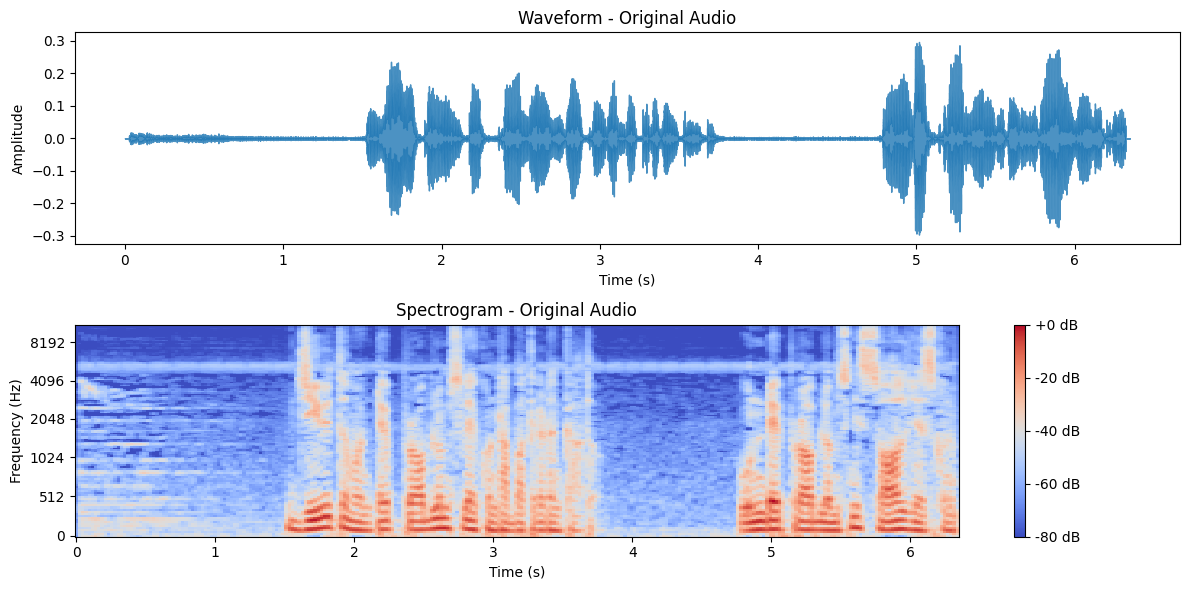

Normalized Audio:


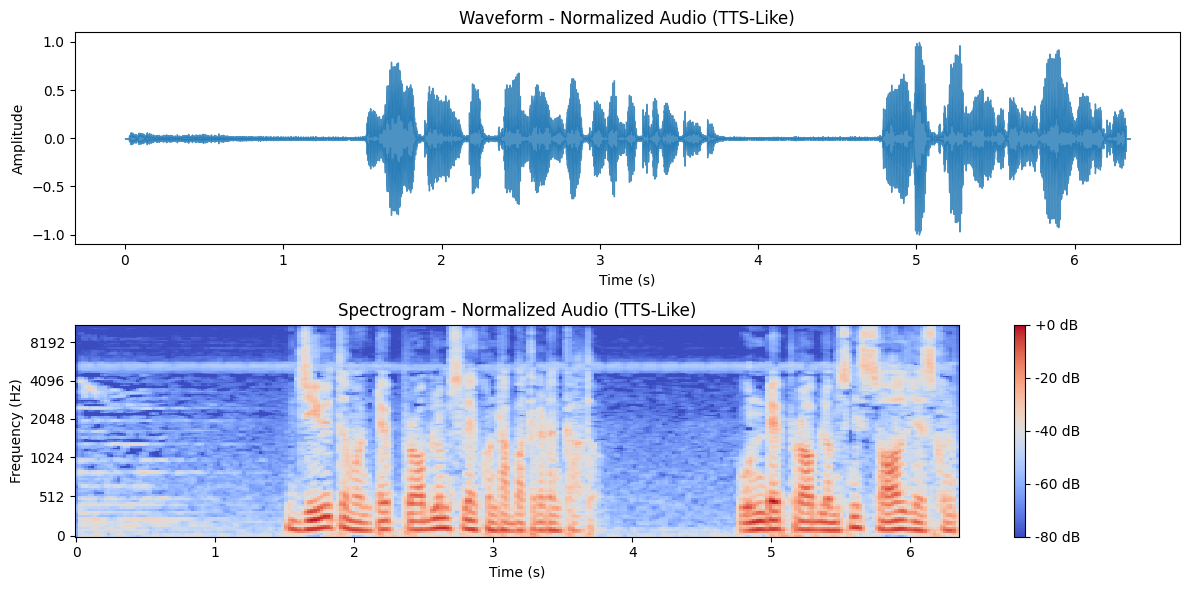

In [18]:
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display
def plot_spectrogram(audio, sr, title):
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(audio, sr=sr, alpha=0.8)
    plt.title(f"Waveform - {title}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.subplot(2, 1, 2)
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel', cmap='coolwarm')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Spectrogram - {title}")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.tight_layout()
    plt.show()
file_path = "../train/telugu/audio/NH_TE_003_N_M_014_002.wav" 
SAMPLE_RATE = 22050
audio, sr = librosa.load(file_path, sr=SAMPLE_RATE)
print("Original Audio:")
plot_spectrogram(audio, sr, "Original Audio")
display(Audio(audio, rate=sr))
normalized_audio = tts_audio_normalizer(audio, target_peak=-1.0, gain_dB=3.0)
normalized_audio = dynamic_audio_normalizer(normalized_audio, sr)
print("Normalized Audio:")
plot_spectrogram(normalized_audio, sr, "Normalized Audio (TTS-Like)")
display(Audio(normalized_audio, rate=sr))

In [19]:
def extract_features(file_path, n_mfcc=MFCC_FEATURES, duration=DURATION, sr=SAMPLE_RATE):
    try:
        audio, sr = librosa.load(file_path, sr=sr, duration=duration)
        normalized_audio = tts_audio_normalizer(audio, target_peak=-1.0, gain_dB=3.0)
        normalized_audio = dynamic_audio_normalizer(normalized_audio, sr)
        mfccs = librosa.feature.mfcc(y=normalized_audio, sr=sr, n_mfcc=n_mfcc)
        return np.mean(mfccs.T, axis=0)  
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

In [20]:
data['processed features'] = data['audio_path'].apply(lambda x: extract_features(x))

In [21]:
data

,audio_path,transcript,class_label,gender,features,class_label_encoded,processed features
0,../train/telugu/audio/H_TE_001_R_F_015_001.wav,ఈ కాలంలో మీరు ఒకసారి ఒబ్సర్వ్ చేయండి మన స్టేటు...,R,F,"[-286.33237, 121.25087, -26.042236, -2.322595,...",4,"[-268.3017, 121.25087, -26.04224, -2.3225925, ..."
1,../train/telugu/audio/H_TE_001_R_F_015_002.wav,హిందూ థర్మాన్ని ఎవరేమన్నా కూడా వాడికొచ్చే ఒకేఒ...,R,F,"[-172.81319, 127.14309, -76.43729, 6.0444326, ...",4,"[-155.27318, 127.14309, -76.43729, 6.0444345, ..."
2,../train/telugu/audio/H_TE_001_R_F_015_003.wav,ఒక ముస్లింనిగాని. ఒక్క నిమిషం భార్గవి కల్యాణిగ...,R,F,"[-84.63917, 109.58822, -56.006912, -0.7241361,...",4,"[-85.373215, 109.58822, -56.006912, -0.7241362..."
3,../train/telugu/audio/H_TE_001_R_F_015_004.wav,ఈ సెక్యులర్ ఇండియా డెమోక్రాటిక్ ఇండియా అని మాట...,R,F,"[-130.09915, 109.08502, -65.609, 23.36312, -24...",4,"[-129.80415, 109.08502, -65.609, 23.363121, -2..."
4,../train/telugu/audio/H_TE_001_R_F_015_005.wav,"హిందువులున్న ఈ భారతదేశంలో ,ఈ భారతదేశంలో , సనాత...",R,F,"[-120.8878, 116.67251, -74.56154, 11.33516, -4...",4,"[-120.22883, 116.67251, -74.56154, 11.33516, -..."
...,...,...,...,...,...,...,...
551,../train/telugu/audio/NH_TE_003_N_M_011_011.wav,బాగుండటం అంటే బాగా ఉండటం కాదత్తా నలుగురితో ఉండ...,N,M,"[-108.940384, 150.52322, 11.374652, 18.984081,...",2,"[-109.244286, 150.52322, 11.374652, 18.984081,..."
552,../train/telugu/audio/NH_TE_003_N_M_011_012.wav,దేవుడు డెఫినిషన్ అర్ధమయిపోయింది బయ్యా ఆడు అక్క...,N,M,"[-266.34357, 119.81172, -7.5376363, 40.312794,...",2,"[-151.43068, 119.81172, -7.5376377, 40.312794,..."
553,../train/telugu/audio/NH_TE_003_N_M_011_013.wav,మనిషిని ప్రేమిస్తే అబధం విలువ తెలుస్తుంది కరెక...,N,M,"[-76.10148, 125.52733, 19.776863, 20.169582, 2...",2,"[-79.48077, 125.52733, 19.776863, 20.16958, 23..."
554,../train/telugu/audio/NH_TE_003_N_M_014_001.wav,ఇంకో విచిత్రం ఏంటంటే మన లైఫ్ ని ఇంటరెస్టింగ్ గ...,N,M,"[-269.79398, 137.68484, -18.070196, 41.73968, ...",2,"[-188.5305, 137.68486, -18.070196, 41.73968, 1..."


In [22]:
data = data.dropna(subset=['processed features'])

In [23]:
data

,audio_path,transcript,class_label,gender,features,class_label_encoded,processed features
0,../train/telugu/audio/H_TE_001_R_F_015_001.wav,ఈ కాలంలో మీరు ఒకసారి ఒబ్సర్వ్ చేయండి మన స్టేటు...,R,F,"[-286.33237, 121.25087, -26.042236, -2.322595,...",4,"[-268.3017, 121.25087, -26.04224, -2.3225925, ..."
1,../train/telugu/audio/H_TE_001_R_F_015_002.wav,హిందూ థర్మాన్ని ఎవరేమన్నా కూడా వాడికొచ్చే ఒకేఒ...,R,F,"[-172.81319, 127.14309, -76.43729, 6.0444326, ...",4,"[-155.27318, 127.14309, -76.43729, 6.0444345, ..."
2,../train/telugu/audio/H_TE_001_R_F_015_003.wav,ఒక ముస్లింనిగాని. ఒక్క నిమిషం భార్గవి కల్యాణిగ...,R,F,"[-84.63917, 109.58822, -56.006912, -0.7241361,...",4,"[-85.373215, 109.58822, -56.006912, -0.7241362..."
3,../train/telugu/audio/H_TE_001_R_F_015_004.wav,ఈ సెక్యులర్ ఇండియా డెమోక్రాటిక్ ఇండియా అని మాట...,R,F,"[-130.09915, 109.08502, -65.609, 23.36312, -24...",4,"[-129.80415, 109.08502, -65.609, 23.363121, -2..."
4,../train/telugu/audio/H_TE_001_R_F_015_005.wav,"హిందువులున్న ఈ భారతదేశంలో ,ఈ భారతదేశంలో , సనాత...",R,F,"[-120.8878, 116.67251, -74.56154, 11.33516, -4...",4,"[-120.22883, 116.67251, -74.56154, 11.33516, -..."
...,...,...,...,...,...,...,...
551,../train/telugu/audio/NH_TE_003_N_M_011_011.wav,బాగుండటం అంటే బాగా ఉండటం కాదత్తా నలుగురితో ఉండ...,N,M,"[-108.940384, 150.52322, 11.374652, 18.984081,...",2,"[-109.244286, 150.52322, 11.374652, 18.984081,..."
552,../train/telugu/audio/NH_TE_003_N_M_011_012.wav,దేవుడు డెఫినిషన్ అర్ధమయిపోయింది బయ్యా ఆడు అక్క...,N,M,"[-266.34357, 119.81172, -7.5376363, 40.312794,...",2,"[-151.43068, 119.81172, -7.5376377, 40.312794,..."
553,../train/telugu/audio/NH_TE_003_N_M_011_013.wav,మనిషిని ప్రేమిస్తే అబధం విలువ తెలుస్తుంది కరెక...,N,M,"[-76.10148, 125.52733, 19.776863, 20.169582, 2...",2,"[-79.48077, 125.52733, 19.776863, 20.16958, 23..."
554,../train/telugu/audio/NH_TE_003_N_M_014_001.wav,ఇంకో విచిత్రం ఏంటంటే మన లైఫ్ ని ఇంటరెస్టింగ్ గ...,N,M,"[-269.79398, 137.68484, -18.070196, 41.73968, ...",2,"[-188.5305, 137.68486, -18.070196, 41.73968, 1..."


In [24]:
X = np.array(data['processed features'].tolist())
label_encoder = LabelEncoder()
data['class_label_encoded'] = label_encoder.fit_transform(data['class_label'])
y = tf.keras.utils.to_categorical(data['class_label_encoded'])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train[..., np.newaxis, np.newaxis]  
X_test = X_test[..., np.newaxis, np.newaxis]

In [26]:
norm_model = Sequential([
    Conv2D(32, (3, 1), activation='relu', input_shape=(MFCC_FEATURES, 1, 1)),
    MaxPooling2D((2, 1)),
    Dropout(0.3),
    Conv2D(64, (3, 1), activation='relu'),
    MaxPooling2D((2, 1)),
    Dropout(0.3),
    Conv2D(128, (3, 1), activation='relu'),
    MaxPooling2D((2, 1)),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(len(label_encoder.classes_), activation='softmax')
])

norm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
norm_model.summary()

d:\Multimodal_Hate_Speech_Detection\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 38, 1, 32)      │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 19, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 19, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 17, 1, 64)      │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 1, 128)      │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 3, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 3, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,885 (511.27 KB)

 Trainable params: 130,885 (511.27 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = norm_model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.15, verbose=1, shuffle=True)

Epoch 1/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.2387 - loss: 4.2353 - val_accuracy: 0.3788 - val_loss: 1.5493
Epoch 2/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2534 - loss: 2.3852 - val_accuracy: 0.3636 - val_loss: 1.5537
Epoch 3/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3255 - loss: 1.7731 - val_accuracy: 0.4242 - val_loss: 1.4963
Epoch 4/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3330 - loss: 1.6732 - val_accuracy: 0.4394 - val_loss: 1.5104
Epoch 5/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2775 - loss: 1.6276 - val_accuracy: 0.4242 - val_loss: 1.4975
Epoch 6/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3379 - loss: 1.4918 - val_accuracy: 0.4697 - val_loss: 1.4937
Epoch 7/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3510 - loss: 1.5229 - val_accuracy: 0.4394 - val_loss: 1.4763
Epoch 8/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3118 - loss: 1.5721 - val_accuracy: 0.

In [29]:
test_loss, test_accuracy = norm_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5266 - loss: 1.4880
Test Accuracy: 54.05%


In [30]:
y_pred = norm_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
report = classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_)
print(report)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
              precision    recall  f1-score   support

           C       0.46      0.62      0.53        21
           G       0.71      0.55      0.62        22
           N       0.60      0.75      0.67        36
           P       0.60      0.33      0.43        18
           R       0.18      0.14      0.16        14

    accuracy                           0.54       111
   macro avg       0.51      0.48      0.48       111
weighted avg       0.54      0.54      0.53       111



In [31]:
norm_model.save("../models/telugu_audio_classification_model_with_normalizers.h5")

Data Augmentation

In [32]:
data

,audio_path,transcript,class_label,gender,features,class_label_encoded,processed features
0,../train/telugu/audio/H_TE_001_R_F_015_001.wav,ఈ కాలంలో మీరు ఒకసారి ఒబ్సర్వ్ చేయండి మన స్టేటు...,R,F,"[-286.33237, 121.25087, -26.042236, -2.322595,...",4,"[-268.3017, 121.25087, -26.04224, -2.3225925, ..."
1,../train/telugu/audio/H_TE_001_R_F_015_002.wav,హిందూ థర్మాన్ని ఎవరేమన్నా కూడా వాడికొచ్చే ఒకేఒ...,R,F,"[-172.81319, 127.14309, -76.43729, 6.0444326, ...",4,"[-155.27318, 127.14309, -76.43729, 6.0444345, ..."
2,../train/telugu/audio/H_TE_001_R_F_015_003.wav,ఒక ముస్లింనిగాని. ఒక్క నిమిషం భార్గవి కల్యాణిగ...,R,F,"[-84.63917, 109.58822, -56.006912, -0.7241361,...",4,"[-85.373215, 109.58822, -56.006912, -0.7241362..."
3,../train/telugu/audio/H_TE_001_R_F_015_004.wav,ఈ సెక్యులర్ ఇండియా డెమోక్రాటిక్ ఇండియా అని మాట...,R,F,"[-130.09915, 109.08502, -65.609, 23.36312, -24...",4,"[-129.80415, 109.08502, -65.609, 23.363121, -2..."
4,../train/telugu/audio/H_TE_001_R_F_015_005.wav,"హిందువులున్న ఈ భారతదేశంలో ,ఈ భారతదేశంలో , సనాత...",R,F,"[-120.8878, 116.67251, -74.56154, 11.33516, -4...",4,"[-120.22883, 116.67251, -74.56154, 11.33516, -..."
...,...,...,...,...,...,...,...
551,../train/telugu/audio/NH_TE_003_N_M_011_011.wav,బాగుండటం అంటే బాగా ఉండటం కాదత్తా నలుగురితో ఉండ...,N,M,"[-108.940384, 150.52322, 11.374652, 18.984081,...",2,"[-109.244286, 150.52322, 11.374652, 18.984081,..."
552,../train/telugu/audio/NH_TE_003_N_M_011_012.wav,దేవుడు డెఫినిషన్ అర్ధమయిపోయింది బయ్యా ఆడు అక్క...,N,M,"[-266.34357, 119.81172, -7.5376363, 40.312794,...",2,"[-151.43068, 119.81172, -7.5376377, 40.312794,..."
553,../train/telugu/audio/NH_TE_003_N_M_011_013.wav,మనిషిని ప్రేమిస్తే అబధం విలువ తెలుస్తుంది కరెక...,N,M,"[-76.10148, 125.52733, 19.776863, 20.169582, 2...",2,"[-79.48077, 125.52733, 19.776863, 20.16958, 23..."
554,../train/telugu/audio/NH_TE_003_N_M_014_001.wav,ఇంకో విచిత్రం ఏంటంటే మన లైఫ్ ని ఇంటరెస్టింగ్ గ...,N,M,"[-269.79398, 137.68484, -18.070196, 41.73968, ...",2,"[-188.5305, 137.68486, -18.070196, 41.73968, 1..."


In [33]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
def augment_audio(audio, sr):
    noise = np.random.randn(len(audio))
    audio_noise = audio + 0.005 * noise
    audio_stretch = librosa.effects.time_stretch(audio, rate=0.8)
    audio_shift = librosa.effects.pitch_shift(audio, sr=sr, n_steps=4)
    return [audio, audio_noise, audio_stretch, audio_shift]
augmented_data = []
def extract_features(audio, n_mfcc=MFCC_FEATURES, duration=DURATION, sr=SAMPLE_RATE):
    try:
        normalized_audio = tts_audio_normalizer(audio, target_peak=-1.0, gain_dB=3.0)
        normalized_audio = dynamic_audio_normalizer(normalized_audio, sr)
        mfccs = librosa.feature.mfcc(y=normalized_audio, sr=sr, n_mfcc=n_mfcc)
        return np.mean(mfccs.T, axis=0)
    except Exception as e:
        print(f"Error processing audio: {e}")
        return None
for index, row in data.iterrows():
    audio, sr = librosa.load(row['audio_path'], sr=SAMPLE_RATE)
    augmented_audios = augment_audio(audio, sr)
    for aug_audio in augmented_audios:
        features = extract_features(aug_audio, n_mfcc=MFCC_FEATURES, duration=DURATION, sr=SAMPLE_RATE)
        if features is not None:
            augmented_data.append({
                'features': features,
                'class_label': row['class_label']
            })

augmented_df = pd.DataFrame(augmented_data)
augmented_df

,features,class_label
0,"[-245.73096, 128.85915, -25.848757, -9.65154, ...",R
1,"[-190.85463918874538, 78.19533914790337, -2.56...",R
2,"[-256.27377, 125.856804, -25.63333, -11.353734...",R
3,"[-232.71083, 120.6062, -50.951675, -5.627678, ...",R
4,"[-157.35614, 122.20584, -75.999985, 6.9707994,...",R
...,...,...
2199,"[-167.94699, 116.86087, -13.174835, 32.34923, ...",N
2200,"[-239.183, 112.59163, 9.434854, 32.656906, -3....",N
2201,"[-134.4669032650706, 46.871527378102996, 20.06...",N
2202,"[-251.72372, 109.927086, 10.203119, 32.517754,...",N


In [34]:
label_encoder = LabelEncoder()
augmented_df['class_label_encoded'] = label_encoder.fit_transform(augmented_df['class_label'])

In [35]:
augmented_df

,features,class_label,class_label_encoded
0,"[-245.73096, 128.85915, -25.848757, -9.65154, ...",R,4
1,"[-190.85463918874538, 78.19533914790337, -2.56...",R,4
2,"[-256.27377, 125.856804, -25.63333, -11.353734...",R,4
3,"[-232.71083, 120.6062, -50.951675, -5.627678, ...",R,4
4,"[-157.35614, 122.20584, -75.999985, 6.9707994,...",R,4
...,...,...,...
2199,"[-167.94699, 116.86087, -13.174835, 32.34923, ...",N,2
2200,"[-239.183, 112.59163, 9.434854, 32.656906, -3....",N,2
2201,"[-134.4669032650706, 46.871527378102996, 20.06...",N,2
2202,"[-251.72372, 109.927086, 10.203119, 32.517754,...",N,2


In [36]:
X_augmented = np.array(augmented_df['features'].tolist())
y_augmented = tf.keras.utils.to_categorical(augmented_df['class_label_encoded'])
X_combined = np.concatenate((X, X_augmented), axis=0)
y_combined = np.concatenate((y, y_augmented), axis=0)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)
X_train = X_train[..., np.newaxis, np.newaxis]
X_test = X_test[..., np.newaxis, np.newaxis]

In [37]:
aug_model = Sequential([
    Conv2D(32, (3, 1), activation='relu', input_shape=(MFCC_FEATURES, 1, 1)),
    MaxPooling2D((2, 1)),
    Dropout(0.3),
    Conv2D(64, (3, 1), activation='relu'),
    MaxPooling2D((2, 1)),
    Dropout(0.3),
    Conv2D(128, (3, 1), activation='relu'),
    MaxPooling2D((2, 1)),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.4),
    Dense(len(label_encoder.classes_), activation='softmax')
])
aug_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
aug_model.summary()

d:\Multimodal_Hate_Speech_Detection\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 38, 1, 32)      │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 19, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 19, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 17, 1, 64)      │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 8, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 1, 128)      │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 3, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 3, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,885 (511.27 KB)

 Trainable params: 130,885 (511.27 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = aug_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[reduce_lr, early_stopping])

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.2347 - loss: 5.7046 - val_accuracy: 0.3900 - val_loss: 3.7396 - learning_rate: 0.0010
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3006 - loss: 3.6398 - val_accuracy: 0.4082 - val_loss: 3.0977 - learning_rate: 0.0010
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3338 - loss: 3.0037 - val_accuracy: 0.4059 - val_loss: 2.6811 - learning_rate: 0.0010
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3495 - loss: 2.6119 - val_accuracy: 0.4490 - val_loss: 2.3869 - learning_rate: 0.0010
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3785 - loss: 2.3410 - val_accuracy: 0.4331 - val_loss: 2.1753 - learning_rate: 0.0010
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4006 - loss: 2.1318 - val_accuracy: 0.4717 - val_loss: 2.0039 - learning_rate: 0.0010
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4050 - loss: 1.9816 - 

In [39]:
test_loss, test_accuracy = aug_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8176 - loss: 0.8049
Test Accuracy: 82.03%


In [40]:
y_pred = aug_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
report = classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_)
print(report)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
              precision    recall  f1-score   support

           C       0.77      0.84      0.80       118
           G       0.88      0.69      0.78       100
           N       0.80      0.92      0.85       216
           P       0.98      0.76      0.85        54
           R       0.82      0.71      0.76        63

    accuracy                           0.82       551
   macro avg       0.85      0.78      0.81       551
weighted avg       0.83      0.82      0.82       551



In [41]:
aug_model.save("../models/telugu_augmentation_model.h5")

In [42]:
from tensorflow.keras.layers import BatchNormalization
imp_aug_model = Sequential([
    Conv2D(64, (3, 1), activation='relu', input_shape=(MFCC_FEATURES, 1, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 1)),
    Dropout(0.3),
    Conv2D(128, (3, 1), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 1)),
    Dropout(0.3),
    Conv2D(256, (3, 1), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 1)),
    Dropout(0.3),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(len(label_encoder.classes_), activation='softmax')
])
imp_aug_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
imp_aug_model.summary()

d:\Multimodal_Hate_Speech_Detection\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 38, 1, 64)      │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 38, 1, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 19, 1, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 19, 1, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 17, 1, 128)     │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 17, 1, 128)     │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 8, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 6, 1, 256)      │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 6, 1, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 3, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 3, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       393,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 523,653 (2.00 MB)

 Trainable params: 521,733 (1.99 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [43]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('../models/telugu_best_audio_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
history = imp_aug_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[reduce_lr, early_stopping, checkpoint])

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.2520 - loss: 2.3825 - val_accuracy: 0.2653 - val_loss: 1.6936 - learning_rate: 0.0010
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3414 - loss: 1.8869 - val_accuracy: 0.4036 - val_loss: 1.4620 - learning_rate: 0.0010
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4007 - loss: 1.6889 - val_accuracy: 0.5034 - val_loss: 1.2734 - learning_rate: 0.0010
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4150 - loss: 1.5645 - val_accuracy: 0.5578 - val_loss: 1.1396 - learning_rate: 0.0010
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4705 - loss: 1.3571 - val_accuracy: 0.5601 - val_loss: 1.1374 - learning_rate: 0.0010
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4538 - loss: 1.4110 - val_accuracy: 0.6168 - val_loss: 0.9947 - learning_rate: 0.0010
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5045 - loss: 1.2724 - 

In [44]:
best_model = tf.keras.models.load_model('../models/telugu_best_audio_model.keras')
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Best Model Test Accuracy: {test_accuracy * 100:.2f}%")

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8819 - loss: 0.4151
Best Model Test Accuracy: 88.02%


In [45]:
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
report = classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_)
print(report)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
              precision    recall  f1-score   support

           C       0.90      0.86      0.88       118
           G       0.83      0.86      0.84       100
           N       0.87      0.94      0.90       216
           P       0.93      0.93      0.93        54
           R       0.94      0.73      0.82        63

    accuracy                           0.88       551
   macro avg       0.89      0.86      0.87       551
weighted avg       0.88      0.88      0.88       551



In [46]:
X_test.shape

(551, 40, 1, 1)

In [47]:
file_path = "../train/telugu/audio/NH_TE_003_N_M_014_002.wav"
audio, sr = librosa.load(file_path, sr=SAMPLE_RATE, duration=DURATION)
def extract_features(audio, n_mfcc=MFCC_FEATURES, duration=DURATION, sr=SAMPLE_RATE):
    try:
        normalized_audio = tts_audio_normalizer(audio, target_peak=-1.0, gain_dB=3.0)
        normalized_audio = dynamic_audio_normalizer(normalized_audio, sr)
        mfccs = librosa.feature.mfcc(y=normalized_audio, sr=sr, n_mfcc=n_mfcc)
        return np.mean(mfccs.T, axis=0)
    except Exception as e:
        print(f"Error processing audio: {e}")
        return None

features = extract_features(audio)
features.shape

(40,)

In [48]:
reshaped_features = features.reshape((1, MFCC_FEATURES, 1, 1))
predicted_class = np.argmax(best_model.predict(reshaped_features), axis=1)
predicted_label = label_encoder.inverse_transform(predicted_class)

print(f"Predicted class: {predicted_label[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted class: N
